In [36]:
import sys

assert sys.version_info >= (3, 7)

In [37]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

In [38]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

import sys
# 코랩의 경우 나눔 폰트를 설치합니다.
if 'google.colab' in sys.modules:
    !sudo apt-get -qq -y install fonts-nanum
    import matplotlib.font_manager as fm
    font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])
    for fpath in font_files:
        fm.fontManager.addfont(fpath)

# 나눔 폰트를 사용합니다.
import matplotlib

matplotlib.rc('font', family='NanumBarunGothic')
matplotlib.rcParams['axes.unicode_minus'] = False

In [39]:
from sklearn.datasets import fetch_olivetti_faces

olivetti = fetch_olivetti_faces()

In [40]:
from sklearn.model_selection import StratifiedShuffleSplit

strat_split = StratifiedShuffleSplit(n_splits=1, test_size=40, random_state=42)
train_valid_idx, test_idx = next(strat_split.split(olivetti.data,
                                                   olivetti.target))
X_train_valid = olivetti.data[train_valid_idx]
y_train_valid = olivetti.target[train_valid_idx]
X_test = olivetti.data[test_idx]
y_test = olivetti.target[test_idx]

strat_split = StratifiedShuffleSplit(n_splits=1, test_size=80, random_state=43)
train_idx, valid_idx = next(strat_split.split(X_train_valid, y_train_valid))
X_train = X_train_valid[train_idx]
y_train = y_train_valid[train_idx]
X_valid = X_train_valid[valid_idx]
y_valid = y_train_valid[valid_idx]

In [41]:
from sklearn.decomposition import PCA

pca = PCA(0.99)
X_train_pca = pca.fit_transform(X_train)
X_valid_pca = pca.transform(X_valid)
X_test_pca = pca.transform(X_test)

pca.n_components_

199

---

In [42]:
from sklearn.cluster import KMeans

k = 4
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
y_pred = kmeans.fit_predict(X_train)

In [43]:
y_pred

array([2, 2, 0, 3, 3, 1, 2, 3, 1, 1, 3, 3, 0, 1, 1, 3, 1, 0, 1, 1, 1, 0,
       2, 1, 1, 2, 0, 1, 2, 2, 1, 1, 2, 2, 3, 3, 2, 3, 1, 0, 1, 1, 0, 1,
       1, 0, 2, 0, 1, 3, 2, 3, 1, 1, 1, 3, 1, 2, 2, 1, 1, 1, 3, 0, 0, 1,
       1, 3, 2, 0, 1, 2, 3, 2, 3, 3, 0, 0, 1, 3, 0, 2, 1, 3, 2, 1, 2, 0,
       0, 0, 1, 1, 2, 0, 1, 0, 3, 3, 1, 1, 2, 0, 3, 3, 2, 0, 2, 2, 2, 0,
       1, 0, 3, 3, 2, 3, 2, 0, 3, 1, 1, 0, 1, 3, 0, 1, 3, 0, 0, 1, 2, 3,
       1, 1, 0, 0, 2, 1, 1, 0, 0, 2, 1, 1, 2, 3, 0, 3, 1, 3, 0, 3, 1, 2,
       0, 0, 3, 1, 3, 1, 3, 0, 2, 0, 2, 1, 1, 2, 3, 3, 3, 0, 1, 2, 2, 3,
       2, 0, 3, 1, 3, 2, 3, 0, 1, 0, 1, 2, 0, 1, 0, 1, 1, 0, 3, 1, 1, 3,
       3, 1, 3, 3, 0, 1, 2, 1, 0, 0, 1, 3, 2, 3, 2, 0, 2, 3, 3, 3, 1, 0,
       0, 2, 1, 0, 0, 3, 3, 1, 0, 2, 1, 1, 2, 0, 0, 3, 0, 0, 0, 2, 2, 1,
       3, 3, 1, 3, 1, 1, 1, 0, 3, 1, 1, 3, 2, 3, 3, 0, 3, 0, 3, 1, 1, 1,
       3, 1, 0, 2, 1, 1, 3, 0, 0, 1, 2, 1, 0, 3, 3, 1], dtype=int32)

In [44]:
y_pred is kmeans.labels_

True

In [45]:
kmeans.cluster_centers_

array([[0.4497348 , 0.5106698 , 0.5793142 , ..., 0.26865673, 0.25706178,
        0.24916738],
       [0.48907256, 0.5311295 , 0.57543623, ..., 0.2550964 , 0.25555557,
        0.25780532],
       [0.3249649 , 0.33775145, 0.36043972, ..., 0.40129426, 0.41602993,
        0.40269765],
       [0.29427388, 0.31328216, 0.33707199, ..., 0.41723728, 0.38347107,
        0.36735538]], dtype=float32)

In [46]:
kmeans.predict(X_train)

array([2, 2, 0, 3, 3, 1, 2, 3, 1, 1, 3, 3, 0, 1, 1, 3, 1, 0, 1, 1, 1, 0,
       2, 1, 1, 2, 0, 1, 2, 2, 1, 1, 2, 2, 3, 3, 2, 3, 1, 0, 1, 1, 0, 1,
       1, 0, 2, 0, 1, 3, 2, 3, 1, 1, 1, 3, 1, 2, 2, 1, 1, 1, 3, 0, 0, 1,
       1, 3, 2, 0, 1, 2, 3, 2, 3, 3, 0, 0, 1, 3, 0, 2, 1, 3, 2, 1, 2, 0,
       0, 0, 1, 1, 2, 0, 1, 0, 3, 3, 1, 1, 2, 0, 3, 3, 2, 0, 2, 2, 2, 0,
       1, 0, 3, 3, 2, 3, 2, 0, 3, 1, 1, 0, 1, 3, 0, 1, 3, 0, 0, 1, 2, 3,
       1, 1, 0, 0, 2, 1, 1, 0, 0, 2, 1, 1, 2, 3, 0, 3, 1, 3, 0, 3, 1, 2,
       0, 0, 3, 1, 3, 1, 3, 0, 2, 0, 2, 1, 1, 2, 3, 3, 3, 0, 1, 2, 2, 3,
       2, 0, 3, 1, 3, 2, 3, 0, 1, 0, 1, 2, 0, 1, 0, 1, 1, 0, 3, 1, 1, 3,
       3, 1, 3, 3, 0, 1, 2, 1, 0, 0, 1, 3, 2, 3, 2, 0, 2, 3, 3, 3, 1, 0,
       0, 2, 1, 0, 0, 3, 3, 1, 0, 2, 1, 1, 2, 0, 0, 3, 0, 0, 0, 2, 2, 1,
       3, 3, 1, 3, 1, 1, 1, 0, 3, 1, 1, 3, 2, 3, 3, 0, 3, 0, 3, 1, 1, 1,
       3, 1, 0, 2, 1, 1, 3, 0, 0, 1, 2, 1, 0, 3, 3, 1], dtype=int32)

In [47]:
kmeans.transform(X_train).round(2)

array([[10.95, 10.65,  8.93, 11.86],
       [14.79, 11.53,  6.31, 14.06],
       [10.01, 13.11, 17.88, 10.39],
       ...,
       [10.54,  8.26,  8.23,  7.6 ],
       [ 9.95,  9.57, 12.58,  6.06],
       [ 7.79,  5.51, 10.76,  9.65]], dtype=float32)

In [48]:
from sklearn.metrics import silhouette_score

silhouette_score(X_train, kmeans.labels_)

0.113990605

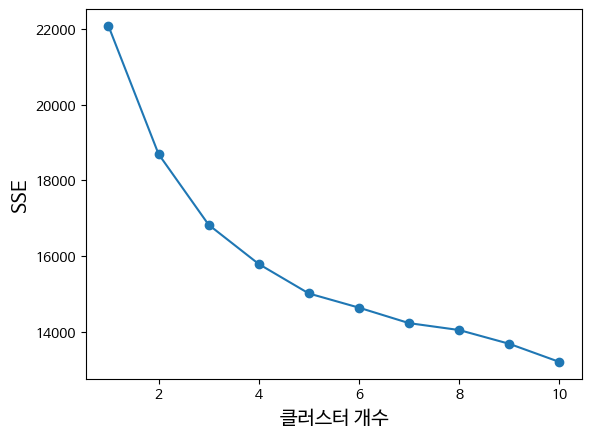

In [49]:
# 엘보우 방법을 사용하여 최적의 K값 탐색
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_train)
    sse.append(kmeans.inertia_)

# SSE 그래프 그리기
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('클러스터 개수')
plt.ylabel('SSE')
plt.show()

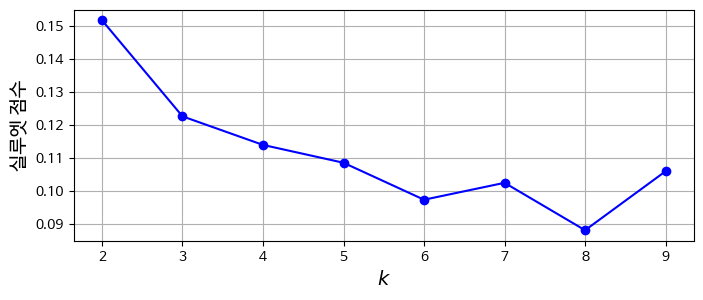

In [50]:
silhouette_scores = [silhouette_score(X_train, model.labels_)
                     for model in kmeans_per_k[1:]]

plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$")
plt.ylabel("실루엣 점수")
plt.grid()
plt.show()

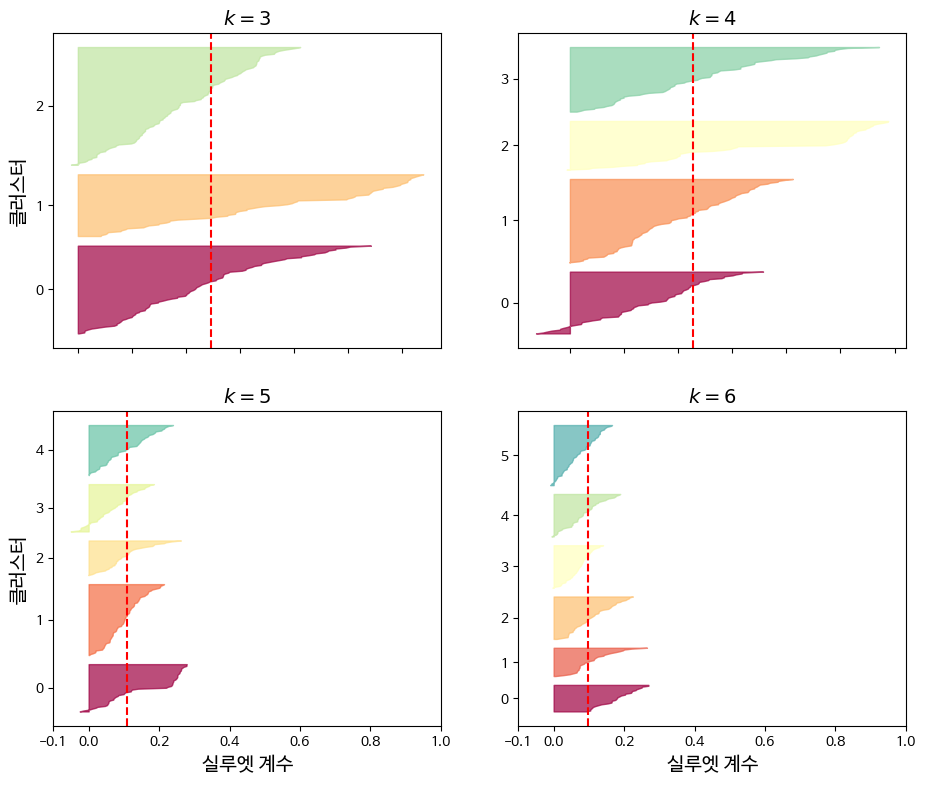

In [51]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
import numpy as np

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)

    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X_train, y_pred)

    padding = len(X_train) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = plt.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("클러스터")

    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("실루엣 계수")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title(f"$k={k}$")

plt.show()

- [K-Means 클러스터 시각화 예시](https://tobelinuxer.tistory.com/141) </br>
- [최적의 k값 탐색](https://gsbang.tistory.com/entry/%EA%B8%B0%EA%B3%84%ED%95%99%EC%8A%B5-k-means-%ED%81%B4%EB%9F%AC%EC%8A%A4%ED%84%B0%EB%A7%81-%EC%B5%9C%EC%A0%81%EC%9D%98-k%EA%B0%92-%ED%83%90%EC%83%89) </br>
- 나머지 교재 코드
- 이개 맞나..